# UNICEF MICS Survey data analysis

Understanding features that can predict why a caretaker might have a vaccination card using classification algorithms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from  sklearn.preprocessing import  StandardScaler
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.utils import resample
from sklearn.metrics import classification_report

Data collected at the children's level (MICS Under Five Children's questionnaire modules: Under-five child information panel, Child's age, Birth registration, Early childhood development, Breastfeeding , Care of illness, Immunization, Under-five child selected for blood test.)

Dataset produced by UNICEF and Central Statistics Organization

In [2]:
#importing ch.csv which was converted from .sav format in R. Check get_Congo_to_csv.R file
#Set low_memory = False to avoid the warning about column numbers having mixed type values.
## 100,104,106,114,115,116,117,118,120,122,123,125,126,127,131,133,134,136,152,153,168

ch_df = pd.read_csv('ch.csv',low_memory=False)

In [3]:
#Convert column with mixed types to object type.

ch_df.iloc[:,[100,104,106,114,115,116,117,118,120,122,123,125,126,127,131,133,134,136,152,153,168]] = ch_df.iloc[:,[100,104,106,114,115,116,117,118,120,122,123,125,126,127,131,133,134,136,152,153,168]].astype(object)
g = ch_df.columns.to_series().groupby(ch_df.dtypes).groups
g

{dtype('int64'): Index(['Unnamed: 0', 'HH1', 'HH2', 'LN', 'UF1', 'UF2', 'UF4', 'UF6', 'UF7',
        'UF8D', 'UF8M', 'UF8Y', 'UF9', 'UF10', 'UF11', 'HH6', 'HH7', 'HL4',
        'CDOI', 'melevel', 'religion', 'zone', 'windex5', 'PSU', 'stratum'],
       dtype='object'),
 dtype('float64'): Index(['UF12H', 'UF12M', 'UF13H', 'UF13M', 'AG1D', 'AG1M', 'AG1Y', 'AG2',
        'BR1', 'BR2',
        ...
        'TN12_4', 'ED4A', 'ED4B', 'CDOB', 'CAGE', 'CAGE_6', 'CAGE_11', 'CAGED',
        'chweight', 'wscore'],
       dtype='object', length=184),
 dtype('O'): Index(['EC7AA', 'EC7AB', 'EC7AX', 'EC7AY', 'EC7BA', 'EC7BB', 'EC7BX', 'EC7BY',
        'EC7CA', 'EC7CB', 'EC7CX', 'EC7CY', 'EC7DA', 'EC7DB', 'EC7DX', 'EC7DY',
        'EC7EA', 'EC7EB', 'EC7EX', 'EC7EY', 'EC7FA', 'EC7FB', 'EC7FX', 'EC7FY',
        'CA6A', 'CA6B', 'CA6C', 'CA6G', 'CA6H', 'CA6L', 'CA6M', 'CA6N', 'CA6O',
        'CA6Q', 'CA6X', 'CA11A', 'CA11B', 'CA11C', 'CA11D', 'CA11E', 'CA11H',
        'CA11I', 'CA11J', 'CA11K', 'CA11L', 'C

In [4]:
ch_df.describe()

,Unnamed: 0,HH1,HH2,LN,UF1,UF2,UF4,UF6,UF7,UF8D,...,CAGE_11,CAGED,melevel,religion,zone,chweight,wscore,windex5,PSU,stratum
count,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000,...,25192.000000,25192.000000,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000
mean,13009.500000,765.843147,10.391959,6.122108,765.843147,10.391959,6.122108,2.889423,11.521255,14.596164,...,2.987496,984.930970,1.822815,1.581098,3.112845,0.968253,-0.107336,2.519217,765.843147,19.632601
std,7510.893988,429.034000,5.756146,3.017196,429.034000,5.756146,3.017196,2.431748,2.895621,7.412582,...,1.427527,1017.925784,0.879074,0.568260,1.603637,1.050827,0.968301,1.414660,429.034000,10.722314
min,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,7.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-1.574326,0.000000,1.000000,1.000000
25%,6505.250000,394.000000,5.000000,4.000000,394.000000,5.000000,4.000000,2.000000,9.000000,9.000000,...,2.000000,417.000000,1.000000,1.000000,2.000000,0.430426,-0.950428,1.000000,394.000000,10.000000
50%,13009.500000,764.000000,10.000000,5.000000,764.000000,10.000000,5.000000,2.000000,12.000000,15.000000,...,3.000000,909.000000,2.000000,2.000000,3.000000,0.677064,-0.260526,2.000000,764.000000,20.000000
75%,19513.750000,1138.000000,15.000000,7.000000,1138.000000,15.000000,7.000000,2.000000,14.000000,21.000000,...,4.000000,1384.000000,3.000000,2.000000,4.000000,1.161744,0.639379,4.000000,1138.000000,29.000000
max,26018.000000,1480.000000,20.000000,41.000000,1480.000000,20.000000,41.000000,39.000000,18.000000,30.000000,...,5.000000,9999.000000,9.000000,9.000000,6.000000,14.433318,3.008995,5.000000,1480.000000,37.000000


In [5]:
columnNumbers = [x for x in range(ch_df.shape[1])]  # list of columns' integer indices

columnNumbers.remove(0) #removing column integer index 0
ch_df = ch_df.iloc[:, columnNumbers] #return all columns except 0th column
ch_df.head()

,HH1,HH2,LN,UF1,UF2,UF4,UF6,UF7,UF8D,UF8M,...,CAGE_11,CAGED,melevel,religion,zone,chweight,wscore,windex5,PSU,stratum
0,1,4,6,1,4,6,2,15,21,2,...,5.0,1656.0,3,1,4,1.262202,1.653178,5,1,1
1,1,5,5,1,5,5,2,12,21,2,...,3.0,1031.0,2,1,4,1.262202,1.973658,5,1,1
2,1,5,6,1,5,6,2,12,21,2,...,4.0,1320.0,2,1,4,1.262202,1.973658,5,1,1
3,1,6,3,1,6,3,2,11,21,2,...,1.0,164.0,3,1,4,1.262202,1.964425,5,1,1
4,1,7,4,1,7,4,2,16,21,2,...,4.0,1162.0,3,1,4,1.262202,1.638443,5,1,1


In [6]:
wm_df = pd.read_csv('wm.csv', low_memory = False)

In [7]:
wm_df.iloc[:,[53,81,102,103,105,121,128,129,146,149]] = wm_df.iloc[:,[53,81,102,103,105,121,128,129,146,149]].astype(object)
g = wm_df.columns.to_series().groupby(wm_df.dtypes).groups
g

{dtype('int64'): Index(['Unnamed: 0', 'HH1', 'HH2', 'LN', 'WM1', 'WM2', 'WM4', 'WM5', 'WM6D',
        'WM6M', 'WM6Y', 'WM7', 'WM8', 'WM9', 'HH6', 'HH7', 'WDOI', 'religion',
        'zone', 'windex5', 'PSU', 'stratum'],
       dtype='object'),
 dtype('float64'): Index(['WM10H', 'WM10M', 'WM11H', 'WM11M', 'WB1M', 'WB1Y', 'WB2', 'WB3', 'WB4',
        'WB5',
        ...
        'WAGEM', 'WDOBFC', 'WDOBLC', 'MSTATUS', 'CEB', 'CSURV', 'CDEAD',
        'welevel', 'wmweight', 'wscore'],
       dtype='object', length=165),
 dtype('O'): Index(['CM13', 'MN2A', 'MN2B', 'MN2C', 'MN2F', 'MN2G', 'MN2X', 'MN14A',
        'MN14B', 'MN14C', 'MN14D', 'MN14E', 'MN14H', 'MN14X', 'MN14Z', 'MN17A',
        'MN17B', 'MN17C', 'MN17F', 'MN17G', 'MN17H', 'MN17X', 'MN17Y', 'MN27A',
        'MN27B', 'MN27C', 'MN27D', 'MN27E', 'MN27F', 'MN27G', 'MN27H', 'MN27I',
        'MN27X', 'IS2A', 'IS2B', 'IS2C', 'IS2D', 'IS2E', 'IS2F', 'IS2G', 'IS2X',
        'IS2Y', 'IS2Z', 'CP3A', 'CP3B', 'CP3C', 'CP3D', 'CP3E', 'CP3F', 'C

In [8]:
columnNumbers = [x for x in range(wm_df.shape[1])]  # list of columns' integer indices

columnNumbers.remove(0) #removing column integer index 0
wm_df = wm_df.iloc[:, columnNumbers] #return all columns except 0th column
wm_df.head()

,HH1,HH2,LN,WM1,WM2,WM4,WM5,WM6D,WM6M,WM6Y,...,CSURV,CDEAD,welevel,religion,zone,wmweight,wscore,windex5,PSU,stratum
0,1,1,3,1,1,3,16,4,3,2011,...,0.0,0.0,3.0,1,4,1.199659,1.580774,5,1,1
1,1,2,2,1,2,2,7,4,3,2011,...,0.0,0.0,3.0,1,4,1.199659,1.355768,5,1,1
2,1,3,2,1,3,2,7,21,2,2011,...,0.0,0.0,3.0,1,4,1.199659,1.351060,5,1,1
3,1,4,2,1,4,2,16,21,2,2011,...,4.0,0.0,3.0,1,4,1.199659,1.653178,5,1,1
4,1,6,2,1,6,2,11,21,2,2011,...,1.0,1.0,3.0,1,4,1.199659,1.964425,5,1,1


In [9]:
ch_wm_df = ch_df.merge(wm_df, on = ['HH1','HH2'])

In [10]:
ch_wm_df.head()

,HH1,HH2,LN_x,UF1,UF2,UF4,UF6,UF7,UF8D,UF8M,...,CSURV,CDEAD,welevel,religion_y,zone_y,wmweight,wscore_y,windex5_y,PSU_y,stratum_y
0,1,4,6,1,4,6,2,15,21,2,...,4.0,0.0,3.0,1,4,1.199659,1.653178,5,1,1
1,1,6,3,1,6,3,2,11,21,2,...,1.0,1.0,3.0,1,4,1.199659,1.964425,5,1,1
2,1,7,4,1,7,4,2,16,21,2,...,3.0,0.0,3.0,1,4,1.199659,1.638443,5,1,1
3,1,7,5,1,7,5,2,16,21,2,...,3.0,0.0,3.0,1,4,1.199659,1.638443,5,1,1
4,1,8,5,1,8,5,2,15,21,4,...,3.0,0.0,3.0,1,4,1.199659,1.229106,5,1,1


In [11]:
hh_df = pd.read_csv('hh.csv', low_memory = False)

In [12]:
hh_df.iloc[:,[36,41]] = hh_df.iloc[:,[36,41]].astype(object)
g = hh_df.columns.to_series().groupby(hh_df.dtypes).groups
g

{dtype('int64'): Index(['Unnamed: 0', 'HH1', 'HH2', 'HH3', 'HH4', 'HH5D', 'HH5M', 'HH5Y', 'HH6',
        'HH7', 'HH9', 'HH16', 'HH17', 'zone', 'windex5', 'PSU', 'stratum'],
       dtype='object'),
 dtype('float64'): Index(['HH10', 'HH11', 'HH12', 'HH13', 'HH14', 'HH15', 'HH18H', 'HH18M',
        'HH19H', 'HH19M', 'WS1', 'WS2', 'WS3', 'WS4', 'WS4AA', 'WS4AB', 'WS4B',
        'WS5', 'WS6', 'WS8', 'WS9', 'WS10', 'WS11', 'HC1A', 'HC1B', 'HC1C',
        'HC2', 'HC3', 'HC4', 'HC5', 'HC6', 'HC7', 'HC8A', 'HC8B', 'HC8C',
        'HC8D', 'HC8E', 'HC8F', 'HC8G', 'HC8H', 'HC8I', 'HC8J', 'HC8K', 'HC8L',
        'HC8M', 'HC8N', 'HC8O', 'HC9A', 'HC9B', 'HC9C', 'HC9D', 'HC9E', 'HC9F',
        'HC9G', 'HC10', 'HC11', 'HC12', 'HC13', 'HC14A', 'HC14B', 'HC14C',
        'HC14D', 'HC14E', 'HC14F', 'HC14G', 'HC14H', 'HC14I', 'HC15', 'TN1',
        'TN2', 'CD6', 'CD8', 'CD9', 'CD_FLAG', 'CD11', 'CD12', 'CD13', 'CD14',
        'CD15', 'CD16', 'CD17', 'CD18', 'CD19', 'CD20', 'CD21', 'CD22', 'HW1',
        'HW

In [13]:
columnNumbers = [x for x in range(hh_df.shape[1])]  # list of columns' integer indices

columnNumbers.remove(0) #removing column integer index 0
hh_df = hh_df.iloc[:, columnNumbers] #return all columns except 0th column
hh_df.head()

,HH1,HH2,HH3,HH4,HH5D,HH5M,HH5Y,HH6,HH7,HH9,...,SI1,HHSEX,religion,zone,helevel,hhweight,wscore,windex5,PSU,stratum
0,1,1,16,2,4,3,2011,1,1,1,...,3.0,1.0,1.0,4,3.0,1.250765,1.580774,5,1,1
1,1,2,7,2,4,3,2011,1,1,1,...,3.0,2.0,1.0,4,1.0,1.250765,1.355768,5,1,1
2,1,3,7,2,21,2,2011,1,1,1,...,3.0,2.0,1.0,4,2.0,1.250765,1.351060,5,1,1
3,1,4,15,2,21,2,2011,1,1,1,...,3.0,1.0,1.0,4,3.0,1.250765,1.653178,5,1,1
4,1,5,12,2,21,2,2011,1,1,1,...,3.0,1.0,1.0,4,2.0,1.250765,1.973658,5,1,1


In [14]:
df = ch_wm_df.merge(hh_df, on = ['HH1','HH2'])

In [15]:
df.head()

,HH1,HH2,LN_x,UF1,UF2,UF4,UF6,UF7,UF8D,UF8M,...,SI1,HHSEX,religion,zone,helevel,hhweight,wscore,windex5,PSU,stratum
0,1,4,6,1,4,6,2,15,21,2,...,3.0,1.0,1.0,4,3.0,1.250765,1.653178,5,1,1
1,1,6,3,1,6,3,2,11,21,2,...,3.0,1.0,1.0,4,3.0,1.250765,1.964425,5,1,1
2,1,7,4,1,7,4,2,16,21,2,...,3.0,1.0,1.0,4,3.0,1.250765,1.638443,5,1,1
3,1,7,5,1,7,5,2,16,21,2,...,3.0,1.0,1.0,4,3.0,1.250765,1.638443,5,1,1
4,1,8,5,1,8,5,2,15,21,4,...,3.0,1.0,1.0,4,2.0,1.250765,1.229106,5,1,1


Remove ID columns

In [16]:
df = df.loc[:, ~df.columns.str.startswith('UF')]
df = df.loc[:, ~df.columns.str.startswith('HH')]
df = df.loc[:, ~df.columns.str.startswith('LN')]
df.drop('AN1', axis=1, inplace=True)

In [17]:
df['IM1'].unique()

array([ 1.,  2.,  3., nan,  9.])

In [18]:
#Set the target to column IM1 - Has the card and the card is seen
#Seperate the target column from the df.

df['has_card'] = np.where(df['IM1'] == 1, 1,0)

In [19]:
df = df.loc[:, ~df.columns.str.startswith('IM')]

# Handling data imbalance by upsampling the minority class

In [20]:
df_majority = df[df.has_card == 0]
df_minority = df[df.has_card == 1]

print(len(df_majority))
print(len(df_minority))

32289
7682


In [21]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace= True,     # sample with replacement
                                 n_samples=32289,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.has_card.value_counts()

1    32289
0    32289
Name: has_card, dtype: int64

In [22]:
df = df_upsampled

In [23]:
#One hot encoding of categorical values using get_dummies function

dummies = pd.get_dummies(df)
dummies.head()

,AG1D,AG1M,AG1Y,AG2,BR1,BR2,BR3,BR3A,BR4,EC1,...,HW5A_?,HW5A_A,HW5B_?,HW5B_B,HW5C_?,HW5C_C,HW5D_?,HW5D_D,HW5Y_?,HW5Y_Y
2,17.0,12.0,2007.0,3.0,2.0,NaN,NaN,1.0,NaN,2.0,...,0,0,0,0,0,0,0,0,0,0
3,30.0,10.0,2009.0,1.0,2.0,NaN,NaN,1.0,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
5,27.0,9.0,2006.0,4.0,3.0,2.0,2.0,NaN,4.0,3.0,...,0,0,0,0,0,0,0,0,0,0
7,7.0,11.0,2009.0,1.0,2.0,NaN,NaN,1.0,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
8,7.0,11.0,2009.0,1.0,2.0,NaN,NaN,1.0,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
#Replace NaN with 0

dummies = dummies.fillna(0)

In [25]:
target = df['has_card']
target.unique()

array([0, 1], dtype=int64)

1	Yes	    - 6021   
2	No	    - 1279  
8	DK	    - 102	  
9	Missing - 3

In [26]:
#Creating a binary variable since by coding Yes to 1 and any other response as 0.

y=['has_card']
dummy_vars =dummies.columns.values.tolist()
X=[i for i in dummy_vars if i not in y]

# Logistic Regression Classifier

In [27]:
#Training the logistic regression model
logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(dummies[X],dummies[y].values.ravel(), test_size=0.3, random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
feature_importance = abs(logreg.coef_[0])
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

In [29]:
feature_imp_data = list(zip(X_train, feature_importance))
feature_imp_data.sort(key=lambda x: x[1], reverse=True) 

# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent 
people = list(zip(*feature_imp_data))[0]
score = list(zip(*feature_imp_data))[1]

In [30]:
people = people[0:20]
score = score[0:20]
x_pos = np.arange(len(people)) 

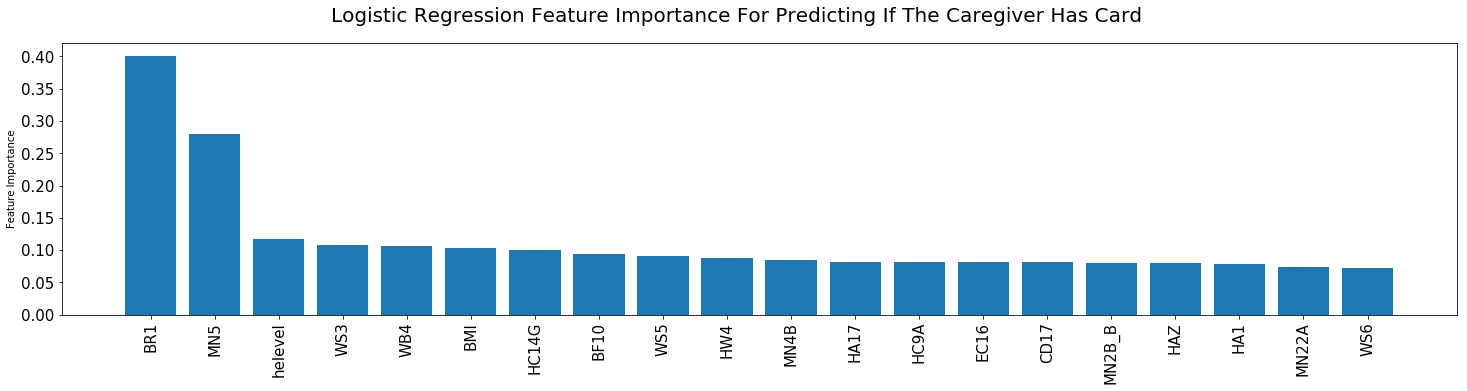

In [31]:
# calculate slope and intercept for the linear trend line
slope, intercept = np.polyfit(x_pos, score, 1)
trendline = intercept + (slope * x_pos)
plt.figure(figsize=(25,5))
plt.bar(x_pos, score,align='center')
plt.xticks(x_pos, people) 
plt.ylabel('Feature Importance')
plt.suptitle('Logistic Regression Feature Importance For Predicting If The Caregiver Has Card', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.xticks(rotation=90)
plt.show()

In [32]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


In [33]:
#Overall classification report

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.80      0.74      0.76      9578
          1       0.76      0.82      0.79      9796

avg / total       0.78      0.78      0.78     19374



# Random Forest Classifier

Random Forests is an ensemble model which uses a large number of strong decision trees through bagging.
Each decision tree is built on a subset of features and a subset of rows from the data.
The model combines all of them in order to smooth out their predictions

In [34]:
#Training the Random Forests model

X_train, X_test, y_train, y_test = train_test_split(dummies[X],dummies[y].values.ravel(), test_size=0.3, random_state=0)

In [35]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
rfc = RandomForestClassifier()

# Train the Classifier to take the training features and learn how they relate
# to the training y 
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [36]:
y_pred = rfc.predict(X_test)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(rfc.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.95


In [37]:
#Overall classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.97      0.92      0.95      9578
          1       0.93      0.98      0.95      9796

avg / total       0.95      0.95      0.95     19374



Let's validate the results of Random Forests Model with kfold cross validation

In [38]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'
results = model_selection.cross_val_score(rfc, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.942


In [39]:
feature_imp_data = list(zip(X_train, rfc.feature_importances_))

In [40]:
feature_imp_data.sort(key=lambda x: x[1], reverse=True) 

# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent 
people = list(zip(*feature_imp_data))[0]
score = list(zip(*feature_imp_data))[1]

In [41]:
people = people[0:20]
score = score[0:20]
x_pos = np.arange(len(people)) 

In [42]:
#Overall classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.97      0.92      0.95      9578
          1       0.93      0.98      0.95      9796

avg / total       0.95      0.95      0.95     19374



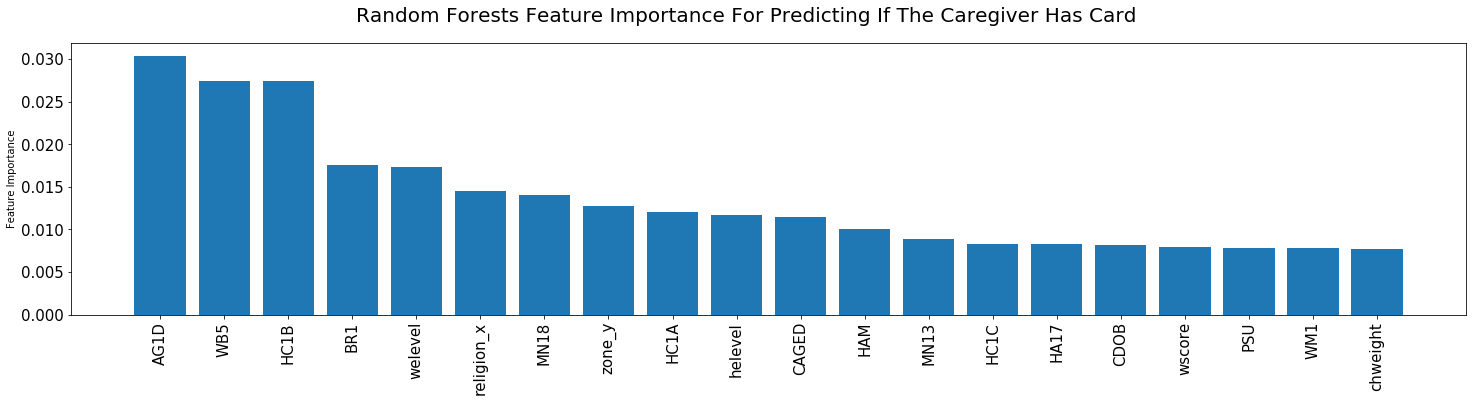

In [43]:
# calculate slope and intercept for the linear trend line
slope, intercept = np.polyfit(x_pos, score, 1)
trendline = intercept + (slope * x_pos)
plt.figure(figsize=(25,5))
plt.bar(x_pos, score,align='center')
plt.xticks(x_pos, people) 
plt.ylabel('Feature Importance')
plt.suptitle('Random Forests Feature Importance For Predicting If The Caregiver Has Card', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.xticks(rotation=90)
plt.show()

# Gradient Boosting Decision Tree Classifier

Gradient Boosting Decision Trees is an ensemble model which uses a sequence of weak constrained decision trees through boosting.
Each tree is allowed a maximum depth and hence tuned and each tree tries to correct the predictions of the trees before it.

In [44]:
gbd = GradientBoostingClassifier()
gbd = gbd.fit(X_train, y_train)

In [45]:
y_pred = gbd.predict(X_test)
print('Accuracy of gradient boosting decision tree classifier on test set: {:.2f}'.format(gbd.score(X_test, y_test)))

Accuracy of gradient boosting decision tree classifier on test set: 0.80


In [46]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'
results = model_selection.cross_val_score(gbd, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.803


In [47]:
feature_imp_data.sort(key=lambda x: x[1], reverse=True) 

# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent 
people = list(zip(*feature_imp_data))[0]
score = list(zip(*feature_imp_data))[1]

In [48]:
people = people[0:20]
score = score[0:20]
x_pos = np.arange(len(people)) 

In [49]:
#Overall classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.83      0.76      0.79      9578
          1       0.78      0.85      0.81      9796

avg / total       0.81      0.80      0.80     19374



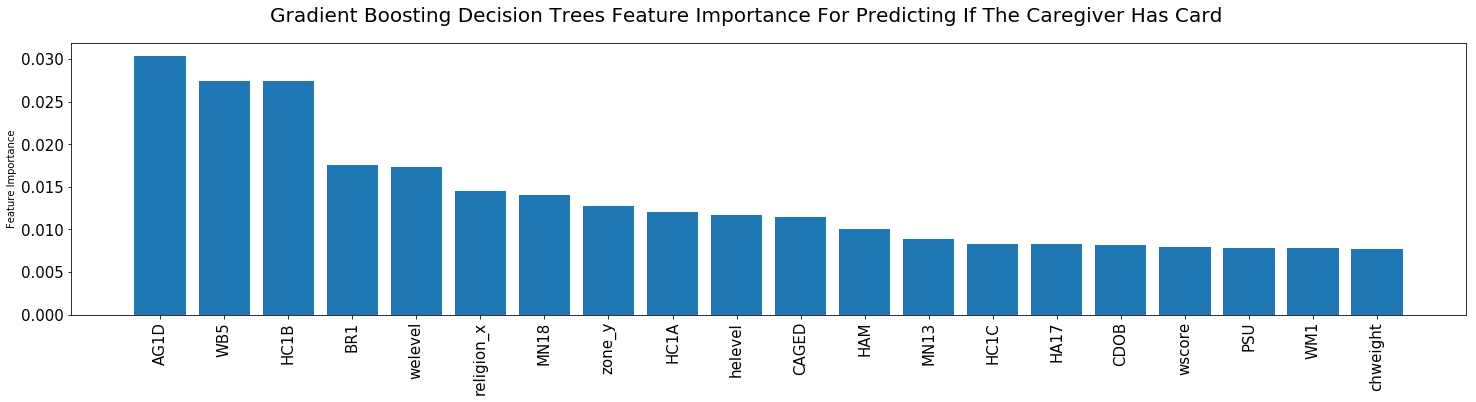

In [50]:
# calculate slope and intercept for the linear trend line
slope, intercept = np.polyfit(x_pos, score, 1)
trendline = intercept + (slope * x_pos)
plt.figure(figsize=(25,5))
plt.bar(x_pos, score,align='center')
plt.xticks(x_pos, people) 
plt.ylabel('Feature Importance')
plt.suptitle('Gradient Boosting Decision Trees Feature Importance For Predicting If The Caregiver Has Card', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.xticks(rotation=90)
plt.show()